# MRF 3D

In [1]:
%pylab inline

import sigpy as sp

from demo_mrf3d import *

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

from matplotlib.gridspec import GridSpec
from matplotlib import lines

Populating the interactive namespace from numpy and matplotlib


In [2]:
lp_time = np.load("results/mrf3d/lp_2.5e-06/time.npy")
lp_iter  = [np.load("results/mrf3d/lp_2.5e-06/iter_%03d.npy" % (k + 1))[:, ::-1, :] for k in range(lp_time.size)]

In [3]:
pc_time = np.load("results/mrf3d/pc_5e-05/time.npy")
pc_iter  = [np.load("results/mrf3d/pc_5e-05/iter_%03d.npy" % (k + 1))[:, ::-1, :] for k in range(pc_time.size)]

In [4]:
msk = np.linalg.norm(lp_iter[-1], axis=0) > 2e-04

In [5]:
lp_iter = [(msk * x)[:, 15:-25, 22:-18] for x in lp_iter]
pc_iter = [(msk * x)[:, 15:-25, 22:-18] for x in pc_iter]

In [6]:
tk = lp_iter[0].shape[0]
scale = [np.linalg.norm(lp_iter[-1][k, ...].ravel(), ord=2) for k in range(tk)]

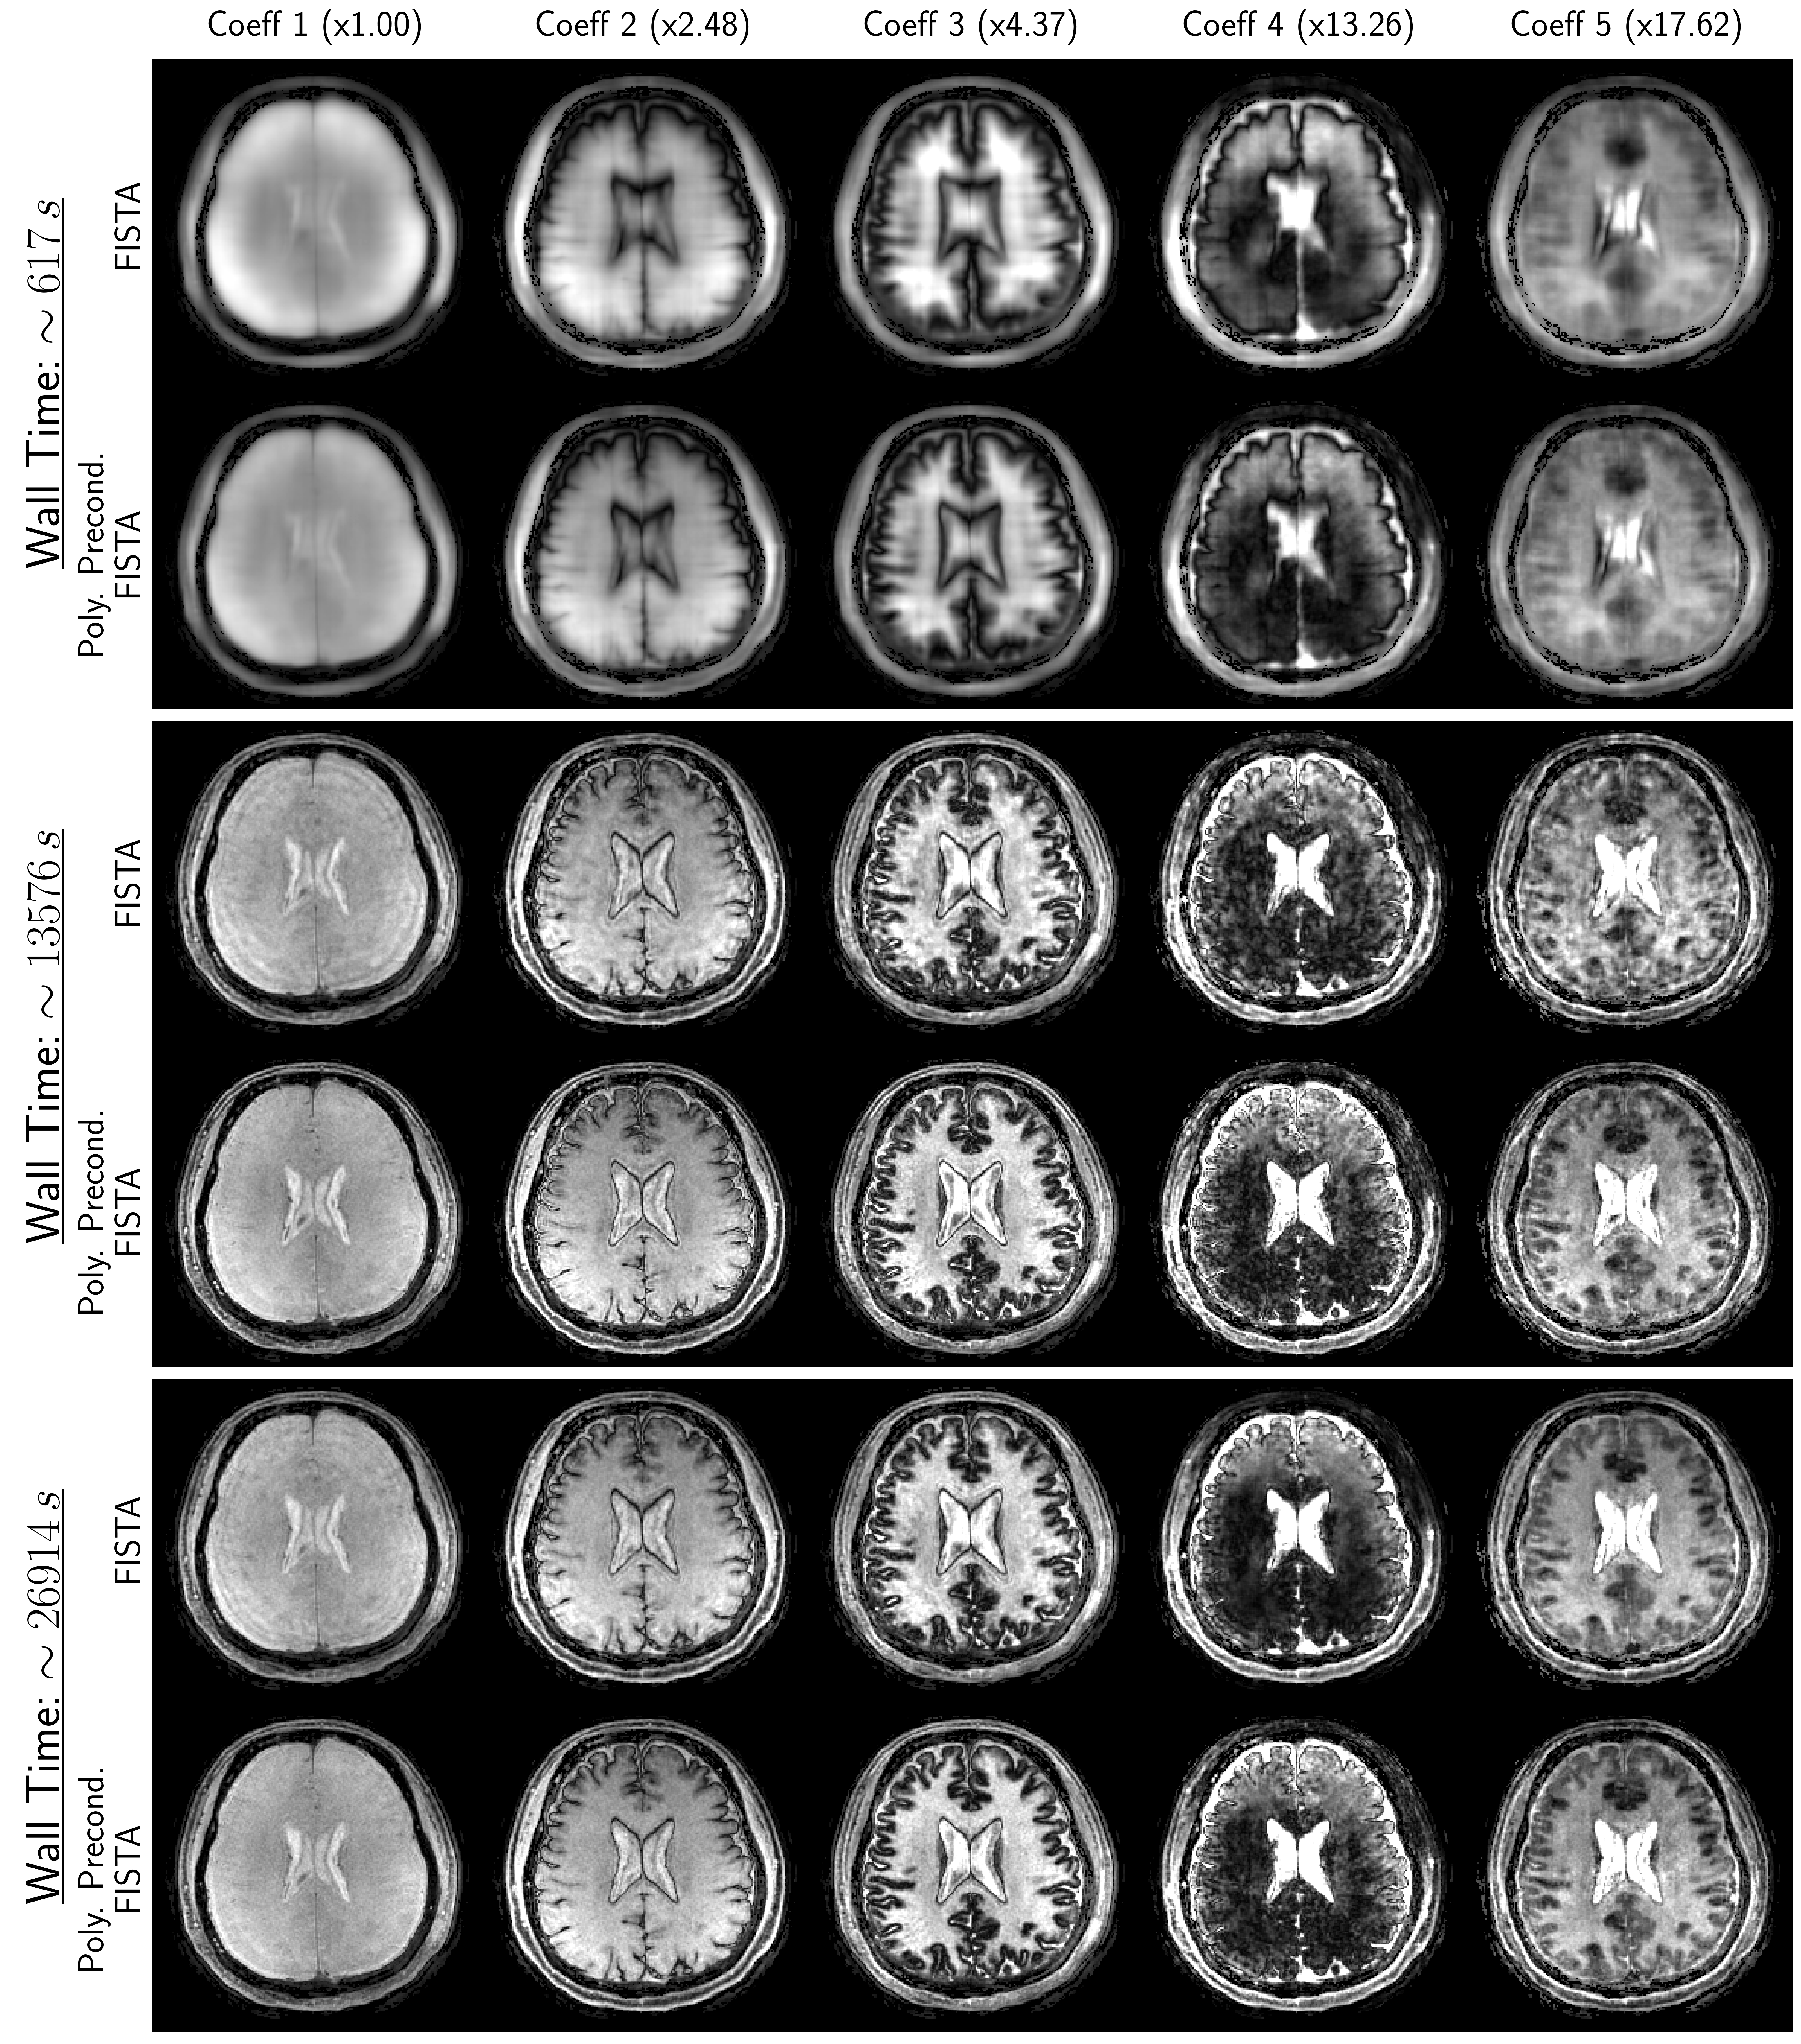

In [7]:
fig, axs = plt.subplots(6, tk, figsize=(6 * 5, tk * 6), dpi=300)

vmin = 0
vmax = 0.01

lp_ref = -1

lp_time_axis = np.linspace(max(pc_time[0], lp_time[0]), lp_time[lp_ref],   3)
pc_time_axis = np.linspace(max(pc_time[0], lp_time[0]), lp_time[lp_ref]/2, 3)

times = []
for p in range(3):
    k1 = np.argmin(np.abs(lp_time_axis[p] - lp_time))
    k2 = np.argmin(np.abs(pc_time_axis[p] - pc_time))
    times.append((lp_time[k1] + pc_time[k2])/2)
    for q in range(tk):
        axs[    p * 2][q].imshow(np.abs(lp_iter[k1][q, ...])/scale[q], cmap="gray", vmin=vmin, vmax=vmax)
        axs[1 + p * 2][q].imshow(np.abs(pc_iter[k2][q, ...])/scale[q], cmap="gray", vmin=vmin, vmax=vmax)

for p in range(3):
    axs[    p * 2][0].set_ylabel("FISTA", fontsize=30)
    axs[1 + p * 2][0].set_ylabel("Poly. Precond.\nFISTA", fontsize=30)

for q in range(tk):
    axs[0][q].set_title("Coeff %d (x%0.2f)" % (q + 1, scale[0]/scale[q]), fontsize=30, y=1.05)

for p in range(axs.shape[0]):
    for q in range(axs.shape[1]):
        axs[p][q].set_xticks([])
        axs[p][q].set_yticks([])
        
plt.subplots_adjust(wspace=-0.54, hspace=0)

# (left-right, up-down)
start = (0.14350, 0.377)
end   = (0.82500, 0.377)
fig.add_artist(lines.Line2D([start[0], end[0]], [start[1], end[1]], lw=10, color="white"))

# (left-right, up-down)
start = (0.14350, 0.629)
end   = (0.82500, 0.629)
fig.add_artist(lines.Line2D([start[0], end[0]], [start[1], end[1]], lw=10, color="white"))

fig.text(0.15, 0.756, r"$\underline{\text{Wall Time:} \sim %0.3d\,s}$" % np.round(times[0]), va='center', rotation='vertical', fontsize=40)
fig.text(0.15, 0.506, r"$\underline{\text{Wall Time:} \sim %0.3d\,s}$" % np.round(times[1]), va='center', rotation='vertical', fontsize=40)
fig.text(0.15, 0.253, r"$\underline{\text{Wall Time:} \sim %0.3d\,s}$" % np.round(times[2]), va='center', rotation='vertical', fontsize=40)

plt.savefig('figures/mrf3d.png')
!convert -trim figures/mrf3d.png figures/mrf3d.png

### Done.